Please upload your Train.zip file...


Saving Train.zip to Train.zip
Dataset extracted successfully!
Dataset Path: /content/Train


100%|██████████| 43/43 [00:17<00:00,  2.46it/s]


Total images loaded: 39209
Train shape: (31367, 48, 48, 3) | Test shape: (7842, 48, 48, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 152s 305ms/step - accuracy: 0.2417 - loss: 2.7716 - val_accuracy: 0.8081 - val_loss: 0.6426
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 149s 302ms/step - accuracy: 0.7165 - loss: 0.8767 - val_accuracy: 0.9628 - val_loss: 0.1708
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 151s 306ms/step - accuracy: 0.8708 - loss: 0.4115 - val_accuracy: 0.9834 - val_loss: 0.0723
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 146s 298ms/step - accuracy: 0.9244 - loss: 0.2512 - val_accuracy: 0.9906 - val_loss: 0.0434
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 151s 307ms/step - accuracy: 0.9430 - loss: 0.1855 - val_accuracy: 0.9932 - val_loss: 0.0291
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 197s 298ms/step - accuracy: 0.9543 - loss: 0.1459 - val_accuracy: 0.9938 - val_loss: 0.0234
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 146s 298ms/step - accuracy: 0.9632 - loss: 0.1229 - val_accuracy: 0.9953 - val_loss: 0.0196
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 149s 303ms/step - accuracy: 0.9692 - loss: 0.10

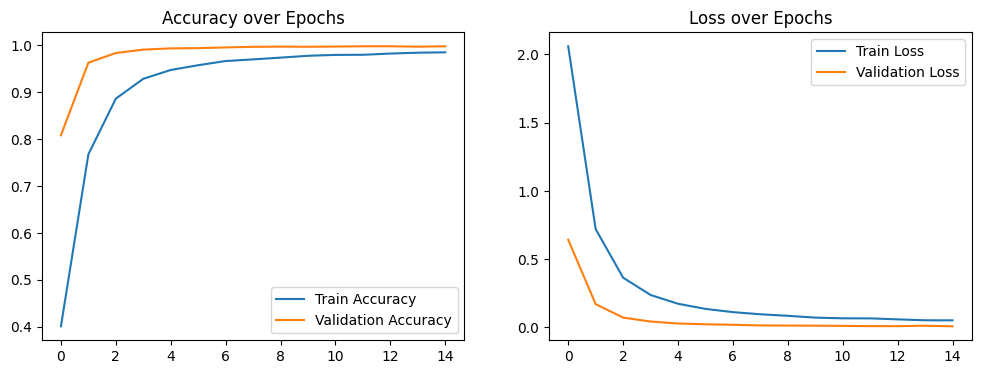

246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step


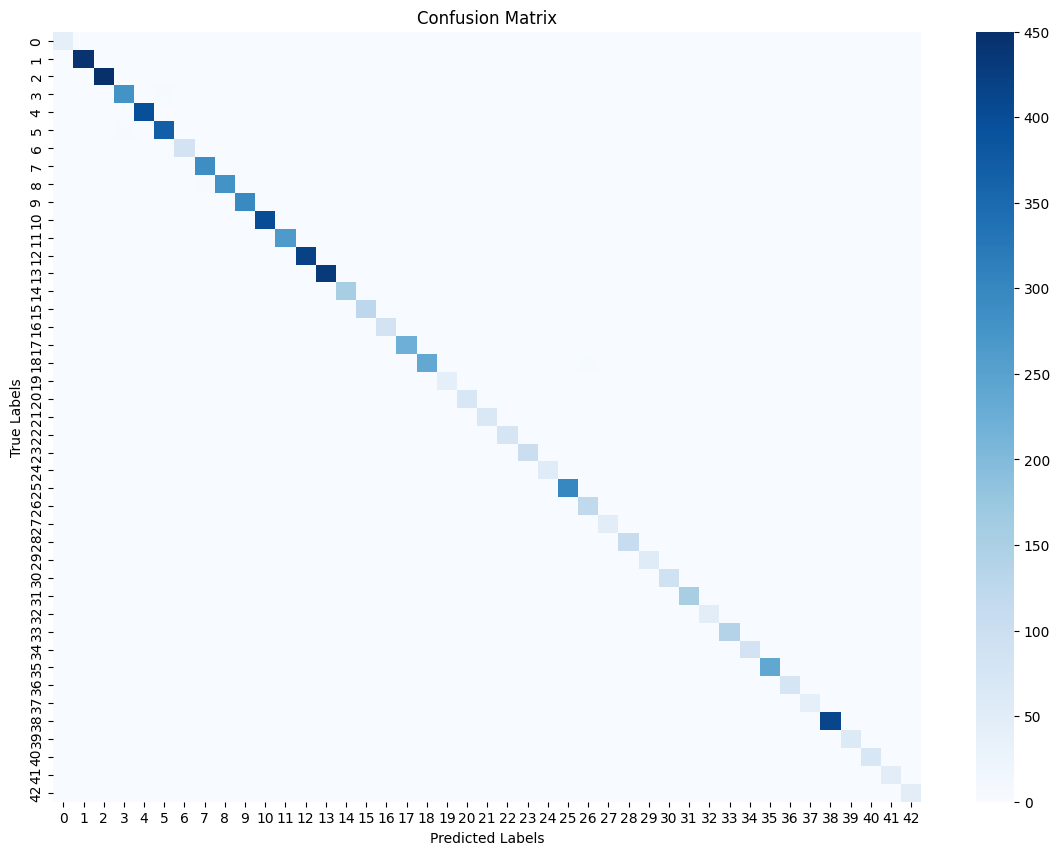


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00       450
           3       0.99      0.99      0.99       282
           4       1.00      1.00      1.00       396
           5       0.99      0.99      0.99       372
           6       1.00      1.00      1.00        84
           7       0.99      1.00      0.99       288
           8       1.00      0.99      0.99       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       1.00      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       1.00      1.00      1.00       126
          16       1.00      1.00      1.00        84
   

In [2]:
# Task 8: Traffic Sign Classification using CNN
# Dataset: GTSRB (German Traffic Sign Recognition Benchmark)

# Step 1: Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from google.colab import files
import zipfile

# Step 2: Upload and extract dataset
print("Please upload your Train.zip file...")
uploaded = files.upload()

with zipfile.ZipFile("Train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")
print("Dataset extracted successfully!")

# Step 3: Define dataset path
dataset_path = "/content/Train"  # Folder name after extraction
print("Dataset Path:", dataset_path)

# Step 4: Load and preprocess images
from tqdm import tqdm
from PIL import Image

images = []
labels = []

for class_folder in tqdm(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((48, 48))  # Resize to 48x48
                images.append(np.array(img))
                labels.append(int(class_folder))
            except:
                continue

images = np.array(images)
labels = np.array(labels)
print("Total images loaded:", len(images))

# Step 5: Normalize and one-hot encode labels
images = images / 255.0
num_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes)

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_cat, test_size=0.2, random_state=42, stratify=labels
)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# Step 7: Data augmentation
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1)
datagen.fit(X_train)

# Step 8: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 9: Train model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 10: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Step 11: Plot accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Loss over Epochs')
plt.show()

# Step 12: Predictions and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 13: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
